In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
df=pd.read_csv("mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [4]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


Here we can see that the data is categorical so we will convert it using label encoder.

In [5]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for column in df.columns:
    df[column]=le.fit_transform(df[column])

In [6]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [7]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


Now the data is normalized using Label Encoder and is making sense and in the data the veil_type column is 0 so we will remove it.

In [8]:
df=df.drop(["veil-type"],axis=1)

# Checking the Data for possible Outliers

In [ ]:
df.plot(kind='box',subplots=True,layout=(6,5),sharex=False,legend=False,fontsize=1,figsize=(22,11))
plt.show()

As we can see that their is no Outlier present so we will continue.

In [ ]:
plt.figure
pd.Series(df["class"]).value_counts().sort_index().plot(kind='bar')
plt.ylabel("Count")
plt.xlabel("Class")
plt.title("No. of Poisonous/Edible mushrooms(0=edible,1=poisonous)")
plt.show()

# Checking Correlation 

In [9]:
corr_mat=df.corr()

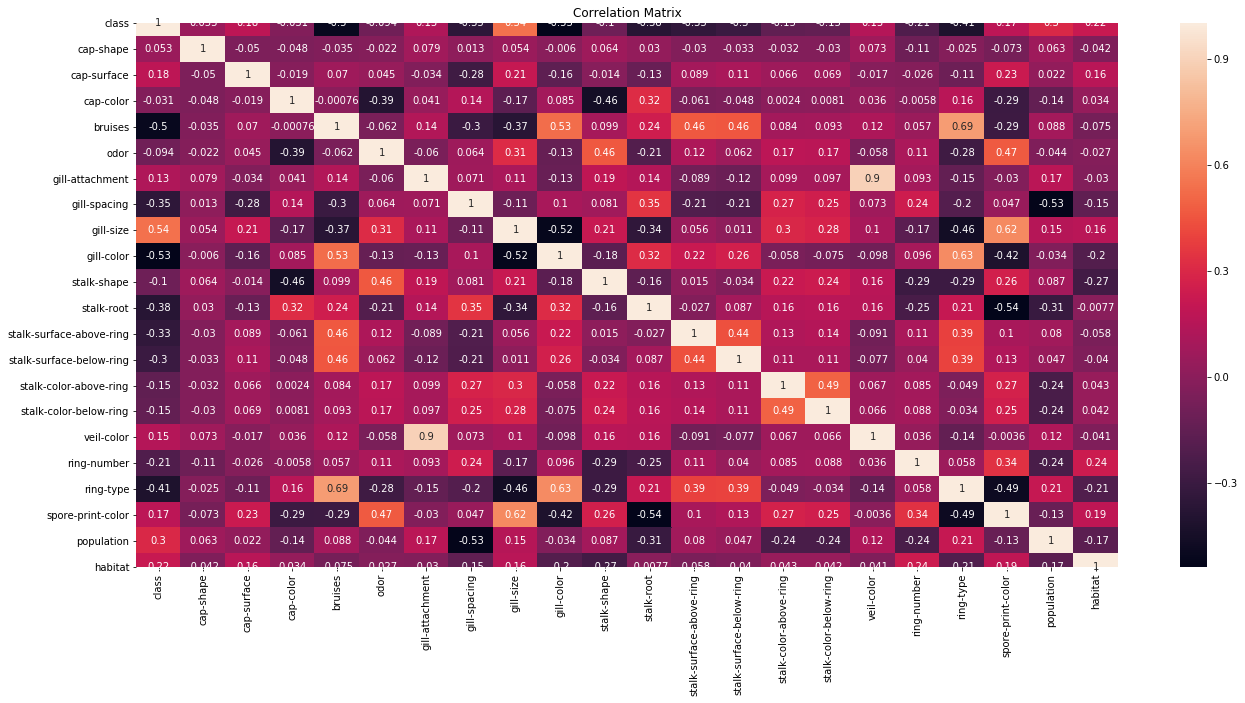

In [10]:
plt.figure(figsize=(22,10))
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

In [11]:
x=df.drop(["class"],axis=1)
y=df["class"]

In [ ]:
x=abs(x.skew())

In [ ]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x)
df_new=pd.DataFrame(df_new,columns=x.columns)

In [ ]:
df_new.skew()

# Creating train_test_split

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3)

In [14]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.9499589827727646
[[1205   54]
 [  68 1111]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1259
           1       0.95      0.94      0.95      1179

   micro avg       0.95      0.95      0.95      2438
   macro avg       0.95      0.95      0.95      2438
weighted avg       0.95      0.95      0.95      2438



In [15]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

1.0
[[1259    0]
 [   0 1179]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1259
           1       1.00      1.00      1.00      1179

   micro avg       1.00      1.00      1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [16]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

1.0
[[1259    0]
 [   0 1179]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1259
           1       1.00      1.00      1.00      1179

   micro avg       1.00      1.00      1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [17]:
from sklearn.svm import SVC

svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

1.0
[[1259    0]
 [   0 1179]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1259
           1       1.00      1.00      1.00      1179

   micro avg       1.00      1.00      1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



We are getting 100% accuracy in DecisionTreeClassifier,SVC and RandomForestClassifier . So their is surely overfitting so we will calculate the cross_val_score

In [19]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(lr,x,y,cv=5)
print("Cross Validation Score for Logistic Regression model :",scr.mean())

Cross Validation Score for Logistic Regression model : 0.8439478047846034


In [20]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(dt,x,y,cv=5)
print("Cross Validation Score for Decision Tree model :",scr.mean())

Cross Validation Score for Decision Tree model : 0.918256291310166


In [21]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(rf,x,y,cv=5)
print("Cross Validation Score for Random Forest model :",scr.mean())

Cross Validation Score for Random Forest model : 0.9059501087621713


In [22]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(svc,x,y,cv=5)
print("Cross Validation Score for SVC model :",scr.mean())

Cross Validation Score for SVC model : 0.864579133510168


Minimum Difference in accuracy and cross_val_score is of DecisionTreeClassifier so hence this is our best model.

# Hyper Parameter Tuning.

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
parameters={'max_depth':np.arange(2,15),
           'criterion':['gini','entropy']}

In [25]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameters,cv=5) #Tuning DecsionTreeClassifier

In [26]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]), 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [27]:
GCV.best_params_ # Printing the best parameter found by GridSearchCV

{'criterion': 'entropy', 'max_depth': 7}

In [28]:
mod=DecisionTreeClassifier(criterion='entropy', max_depth=5)

mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(accuracy_score(y_test,pred)*100)

97.86710418375718


# Saving the Model

In [29]:
import joblib
joblib.dump(mod,"Mushroom1DTC.pk1")

['Mushroom1DTC.pk1']